# Multiple Linear Regression






In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# cargo el csv
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)
#selecciono solo unas columnas
#co2emissions es loq eu se quiere predecir

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


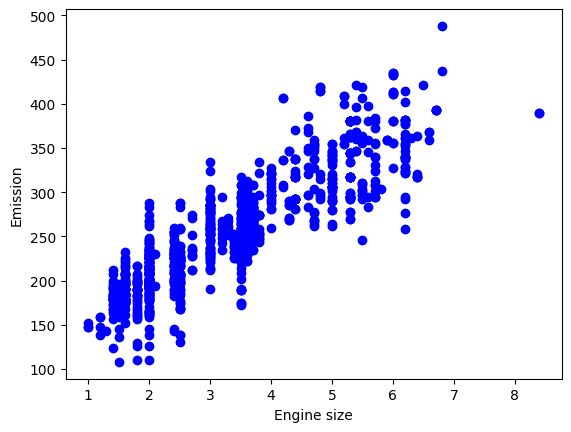

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()
#creo grafico en x el tamano y en y las emisiones que es lo que se quiere predecir

In [7]:
msk = np.random.rand(len(df)) < 0.8
print(msk)
#crea valores aleatorios del tamano del dataframe y separa en 0,8
train = cdf[msk]#en train coge unos y test los contrarios
test = cdf[~msk]


[ True False  True ...  True  True False]


In [9]:
print("en train")
print(train)

en train
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY   
0            2.0          4                   9.9                  6.7  \
2            1.5          4                   6.0                  5.8   
3            3.5          6                  12.7                  9.1   
4            3.5          6                  12.1                  8.7   
7            3.7          6                  12.8                  9.0   
...          ...        ...                   ...                  ...   
1061         3.2          6                  13.0                  8.9   
1062         3.0          6                  13.4                  9.8   
1063         3.2          6                  13.2                  9.5   
1064         3.0          6                  13.4                  9.8   
1065         3.2          6                  12.9                  9.3   

      FUELCONSUMPTION_COMB  CO2EMISSIONS  
0                      8.5           196  
2               

In [10]:
print("en test")
print(test)

en test
      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY   
1            2.4          4                  11.2                  7.7  \
5            3.5          6                  11.9                  7.7   
6            3.5          6                  11.8                  8.1   
9            2.4          4                  10.6                  7.5   
10           2.4          4                  11.2                  8.1   
...          ...        ...                   ...                  ...   
1042         1.4          4                   5.6                  5.2   
1047         3.6          6                  12.4                  8.8   
1055         3.0          6                  12.3                  8.0   
1056         2.5          5                  11.3                  7.8   
1066         3.2          6                  14.9                 10.2   

      FUELCONSUMPTION_COMB  CO2EMISSIONS  
1                      9.6           221  
5                

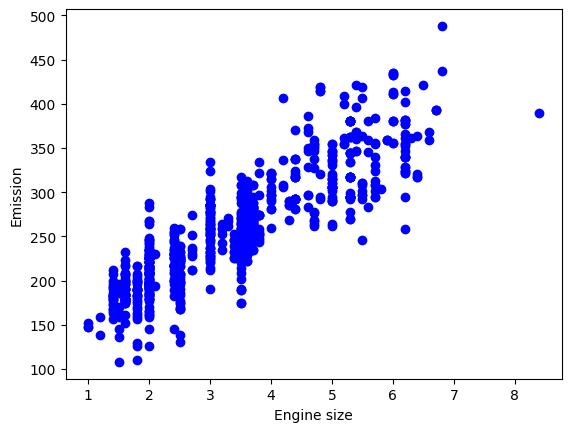

In [11]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')#hace grafico con los valores de esas columnas
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()#llama la regresion
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])#coge de train las columnas
y = np.asanyarray(train[['CO2EMISSIONS']])#coge la columna de la clase


In [13]:
print("en x:")
print(x)

en x:
[[ 2.   4.   8.5]
 [ 1.5  4.   5.9]
 [ 3.5  6.  11.1]
 ...
 [ 3.2  6.  11.5]
 [ 3.   6.  11.8]
 [ 3.2  6.  11.3]]


In [14]:
print("en y:")
print(y)

en y:
[[196]
 [136]
 [255]
 [244]
 [255]
 [267]
 [239]
 [359]
 [359]
 [338]
 [354]
 [354]
 [359]
 [202]
 [214]
 [230]
 [235]
 [251]
 [224]
 [258]
 [224]
 [258]
 [260]
 [227]
 [258]
 [361]
 [239]
 [258]
 [212]
 [246]
 [304]
 [294]
 [336]
 [407]
 [354]
 [354]
 [409]
 [306]
 [308]
 [290]
 [262]
 [285]
 [285]
 [267]
 [281]
 [281]
 [292]
 [209]
 [237]
 [356]
 [320]
 [380]
 [322]
 [380]
 [380]
 [437]
 [181]
 [209]
 [209]
 [209]
 [221]
 [228]
 [237]
 [232]
 [193]
 [200]
 [209]
 [221]
 [230]
 [228]
 [237]
 [202]
 [209]
 [232]
 [281]
 [292]
 [232]
 [292]
 [281]
 [292]
 [246]
 [292]
 [292]
 [356]
 [191]
 [214]
 [212]
 [292]
 [292]
 [317]
 [338]
 [317]
 [338]
 [317]
 [338]
 [317]
 [209]
 [260]
 [230]
 [253]
 [255]
 [320]
 [370]
 [274]
 [324]
 [209]
 [253]
 [278]
 [283]
 [196]
 [212]
 [264]
 [250]
 [264]
 [264]
 [189]
 [228]
 [225]
 [246]
 [228]
 [225]
 [218]
 [221]
 [235]
 [207]
 [251]
 [260]
 [258]
 [232]
 [248]
 [248]
 [294]
 [260]
 [255]
 [262]
 [340]
 [382]
 [340]
 [382]
 [340]
 [322]
 [377]


In [18]:
regr.fit (x, y)#ajusta y saca sus coeficientes

print ('Coefficients: ', regr.coef_)#por cada valor en x, cada columna, estos son los valores que se multiplican
# 2223x+22223454y+2222354z
print("Intercept:",regr.intercept_)#constante que no cambia

Coefficients:  [[11.14096531  7.84769249  9.21573401]]
Intercept: [66.63499975]


In [19]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])#hacemos prediccion con lo de esas columnas
print("predicion:")
print(y_hat)

predicion:
[[213.23513299]
 [244.87187342]
 [245.79344682]
 [209.54883939]
 [215.0782798 ]
 [317.25036664]
 [212.46504047]
 [212.46504047]
 [206.01402666]
 [289.17707609]
 [225.47778974]
 [217.07290748]
 [367.08500972]
 [310.75831058]
 [339.32708603]
 [252.20341839]
 [292.8633697 ]
 [204.17087986]
 [215.22976068]
 [292.8633697 ]
 [197.71986605]
 [200.48458626]
 [201.40615966]
 [182.05311823]
 [197.71986605]
 [200.48458626]
 [239.30139077]
 [219.94834934]
 [245.75240458]
 [313.90807705]
 [200.48458626]
 [258.6544322 ]
 [269.94687839]
 [200.33310537]
 [213.38661388]
 [258.88799757]
 [257.96642417]
 [248.51712478]
 [351.47170923]
 [333.96181461]
 [315.53034658]
 [309.07933277]
 [185.50584646]
 [208.62726599]
 [303.12352084]
 [310.49610805]
 [300.78488914]
 [334.99382664]
 [386.60193712]
 [434.0282691 ]
 [270.3729669 ]
 [305.5034778 ]
 [347.89585426]
 [190.11371346]
 [174.98349278]
 [315.64078522]
 [217.843     ]
 [250.59383696]
 [327.89584706]
 [248.75069016]
 [310.88143733]
 [254.2801305

c:\Users\jmlozanoo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [20]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])#cogemos lo de x e y de test
y = np.asanyarray(test[['CO2EMISSIONS']])


In [21]:
print("en x:")
print(x)

en x:
[[ 2.4  4.   9.6]
 [ 3.5  6.  10. ]
 [ 3.5  6.  10.1]
 [ 2.4  4.   9.2]
 [ 2.4  4.   9.8]
 [ 4.7  8.  14.7]
 [ 2.   4.  10. ]
 [ 2.   4.  10. ]
 [ 2.   4.   9.3]
 [ 4.   8.  12.5]
 [ 3.   6.   8.5]
 [ 2.   4.  10.5]
 [ 5.2 10.  17.8]
 [ 4.2  8.  14.6]
 [ 4.2  8.  17.7]
 [ 3.   6.  11.4]
 [ 4.   8.  12.9]
 [ 2.   4.   9.1]
 [ 2.   4.  10.3]
 [ 4.   8.  12.9]
 [ 2.   4.   8.4]
 [ 2.   4.   8.7]
 [ 2.   4.   8.8]
 [ 2.   4.   6.7]
 [ 2.   4.   8.4]
 [ 2.   4.   8.7]
 [ 3.   6.  10. ]
 [ 3.   6.   7.9]
 [ 3.   6.  10.7]
 [ 4.4  8.  14.7]
 [ 2.   4.   8.7]
 [ 3.   6.  12.1]
 [ 3.6  6.  12.6]
 [ 2.4  4.   8.2]
 [ 2.   4.  10.1]
 [ 3.6  6.  11.4]
 [ 3.6  6.  11.3]
 [ 3.   6.  11. ]
 [ 6.2  8.  16.6]
 [ 6.2  8.  14.7]
 [ 6.2  8.  12.7]
 [ 6.2  8.  12. ]
 [ 1.4  4.   7.8]
 [ 2.4  4.   9.1]
 [ 3.6  6.  16.2]
 [ 3.6  6.  17. ]
 [ 4.3  6.  15.1]
 [ 5.3  8.  15.9]
 [ 5.3  8.  21.5]
 [ 6.   8.  25.8]
 [ 4.3  6.  11.8]
 [ 5.3  8.  12.7]
 [ 5.3  8.  17.3]
 [ 1.4  4.   8.3]
 [ 1.2  4.   6.9]
 [ 5

In [22]:
print("en y:")
print(y)

en y:
[[221]
 [230]
 [232]
 [212]
 [225]
 [338]
 [230]
 [230]
 [214]
 [288]
 [230]
 [242]
 [409]
 [336]
 [407]
 [262]
 [297]
 [209]
 [237]
 [297]
 [193]
 [200]
 [202]
 [181]
 [193]
 [200]
 [230]
 [213]
 [246]
 [338]
 [200]
 [278]
 [290]
 [189]
 [232]
 [262]
 [260]
 [253]
 [382]
 [338]
 [292]
 [276]
 [179]
 [209]
 [259]
 [272]
 [347]
 [366]
 [344]
 [413]
 [271]
 [292]
 [277]
 [191]
 [159]
 [317]
 [232]
 [242]
 [317]
 [237]
 [294]
 [251]
 [258]
 [251]
 [235]
 [198]
 [202]
 [198]
 [179]
 [179]
 [138]
 [382]
 [216]
 [214]
 [315]
 [343]
 [340]
 [175]
 [278]
 [165]
 [165]
 [162]
 [186]
 [207]
 [205]
 [209]
 [237]
 [283]
 [347]
 [366]
 [380]
 [380]
 [380]
 [362]
 [271]
 [269]
 [299]
 [338]
 [186]
 [110]
 [166]
 [209]
 [172]
 [177]
 [258]
 [237]
 [255]
 [143]
 [232]
 [230]
 [184]
 [196]
 [172]
 [189]
 [253]
 [294]
 [281]
 [280]
 [280]
 [248]
 [267]
 [255]
 [209]
 [235]
 [294]
 [251]
 [225]
 [221]
 [228]
 [175]
 [212]
 [276]
 [262]
 [274]
 [338]
 [138]
 [253]
 [320]
 [380]
 [269]
 [262]
 [205]


In [23]:
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))
#cada valor de y_hat -y esto al cuadrado para ver el error cuadratico

#sacamos la puntuacion tambien
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 530.17
Variance score: 0.87
